In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5')
settings.replicates = 2
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R'
settings.HDXer_stride = 10000
settings.RW_do_reweighting = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

In [2]:
print(os.environ["HDXER_PATH"])
print(__name__)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer
__main__


In [3]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer


In [4]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"



In [5]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [6]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


In [7]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [8]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [9]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1
rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   

  experimental                                          int_rates  \
0        False                                                NaN   
1 

In [10]:
print((traj_paths))

['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [11]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

In [12]:
VDX.settings.RW_do_reweighting

False

Random seeds: [42, 43]
Splitting segments for MD_Simulated by redundancy
Train frac:  0.5
No Train peptides:  20
No Val peptides:  21
Final Train Frac:  0.4878048780487805
Saved train MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 3  4  7  8 11 13 14 15 17 18 19 22 24 25 27 28 30 32 35 39]
Saved val MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 0  1  2  5  6  9 10 12 16 20 21 23 26 29 31 33 34 36 37 38 40]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0        9      10  0.18680  0.71010  1.00000  1.00000        3   
1       11      12  0.99880  1.00000  1.00000  1.00000        4   
2       16      17  1.00000  1.00000  1.

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Projec

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/t

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_1/out__val_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING val_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/v

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Projec

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/t

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_2/out__val_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_2/val_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/val_MD_Simulated_2/out__val_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING val_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.555/v

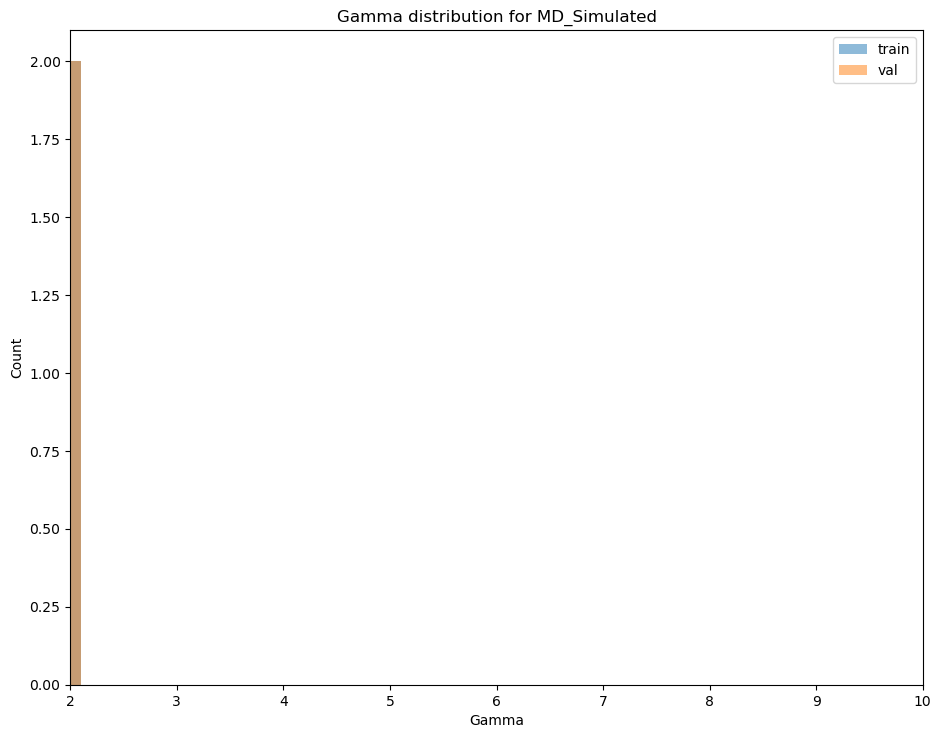

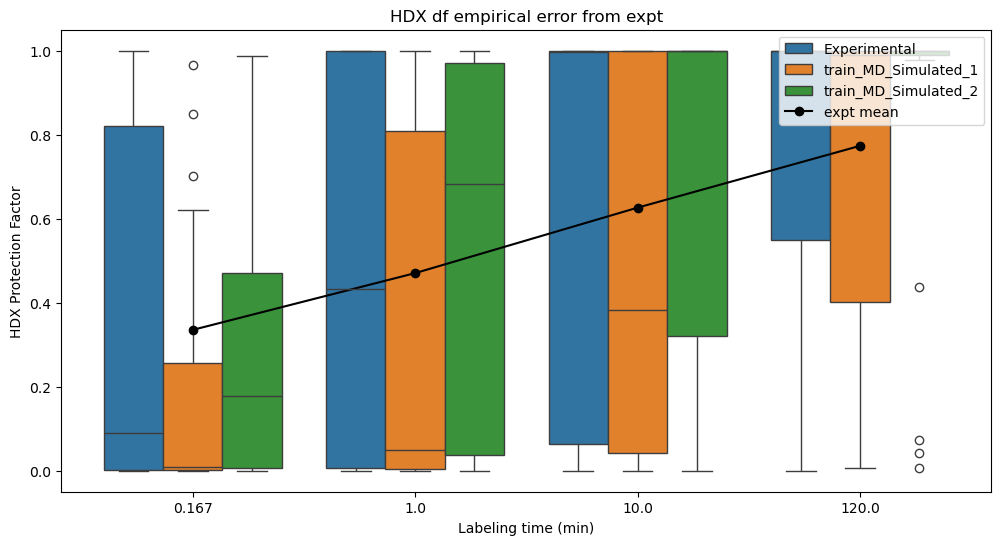

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.00134  0.00802  0.07740  0.61967       16  val_MD_Simulated_2
119  0.04439  0.23808  0.93407  1.00000       17  val_MD_Simulated_2
120  0.00104  0.00621  0.06039  0.52642       18  val_MD_Simulated_2
121  0.00186  0.01111  0.10570  0.73831       19  val_MD_Simulated_2
122  0.03803  0.20721  0.90192  1.00000       20  val_MD_Simulated_2

[123 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

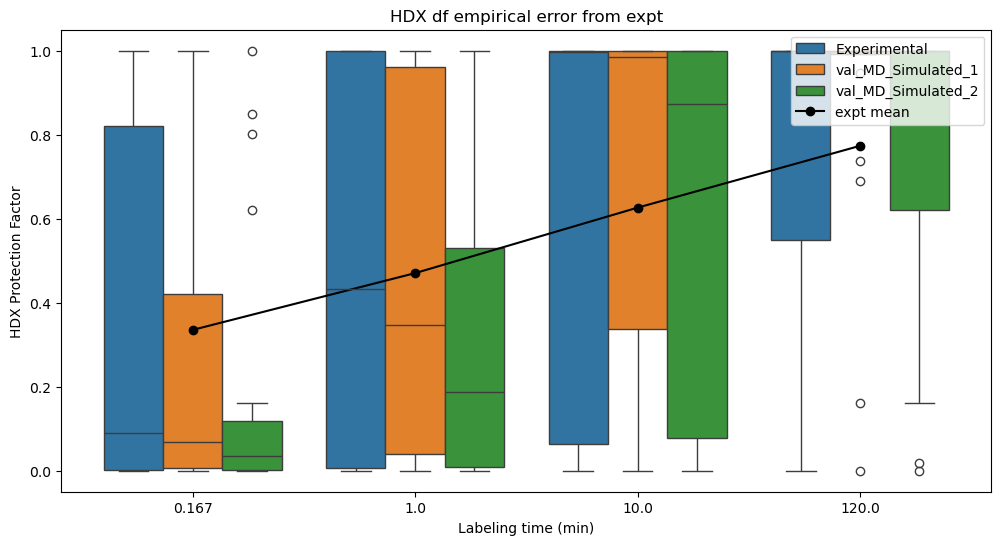

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
train_rep_peptides [3, 4, 7, 8, 11, 13, 14, 15, 17, 18, 19, 22, 24, 25, 27, 28, 30, 32, 35, 39]
val_rep_peptides [0, 1, 2, 5, 6, 9, 10, 12, 16, 20, 21, 23, 26, 29, 31, 33, 34, 36, 37, 38, 40]
train_rep_peptides [2, 3, 5, 8, 9, 11, 13, 14, 15, 16, 21, 24, 26, 28, 30, 31, 34, 37, 39, 40]
val_rep_peptides [0, 1, 4, 6, 7, 10, 12, 17, 18, 19, 20, 22, 23, 25, 27, 29, 32, 33, 35, 36, 38]
manual merge df
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.21479  0.76494  1.00000  1.00000        3  train_MD_Simulated_1
1   0.62150  0.99703  1.00000  1.00000        4  train_MD_Simulated_1
2   0.84959  0.99999  1.00000  1.00000        7  train_MD_Simulated_1
3   0.01139  0.06627  0.49627  0.99973        8  train_MD_Simulated_1
4   0.00001  0.00004  0.00044  0.00532       11  train_MD_Simulated_1
..      ...      ...      ...      ...      ...         

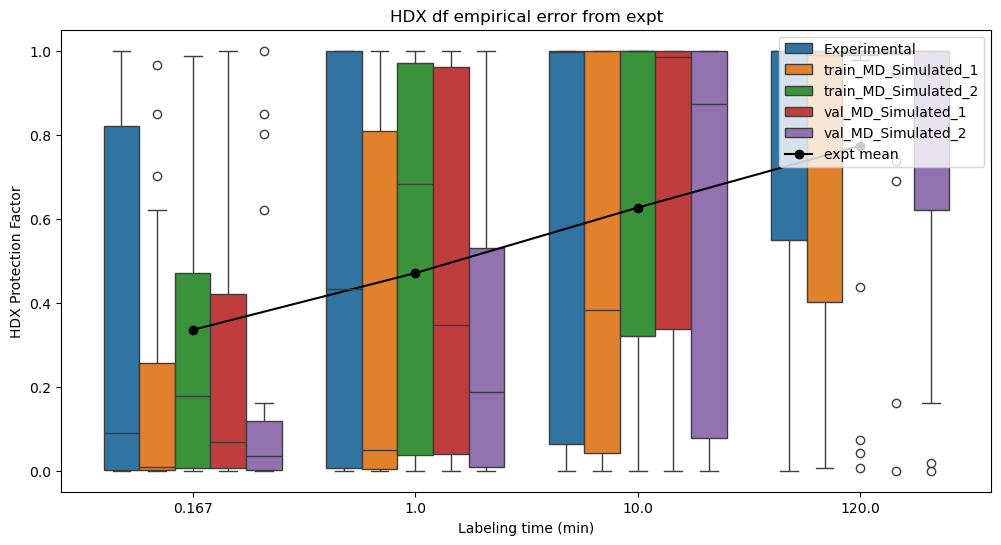

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.00134  0.00802  0.07740  0.61967       32  val_MD_Simulated_2
119  0.04439  0.23808  0.93407  1.00000       33  val_MD_Simulated_2
120  0.00104  0.00621  0.06039  0.52642       35  val_MD_Simulated_2
121  0.00186  0.01111  0.10570  0.73831       36  val_MD_Simulated_2
122  0.03803  0.20721  0.90192  1.00000       38  val_MD_Simulated_2

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

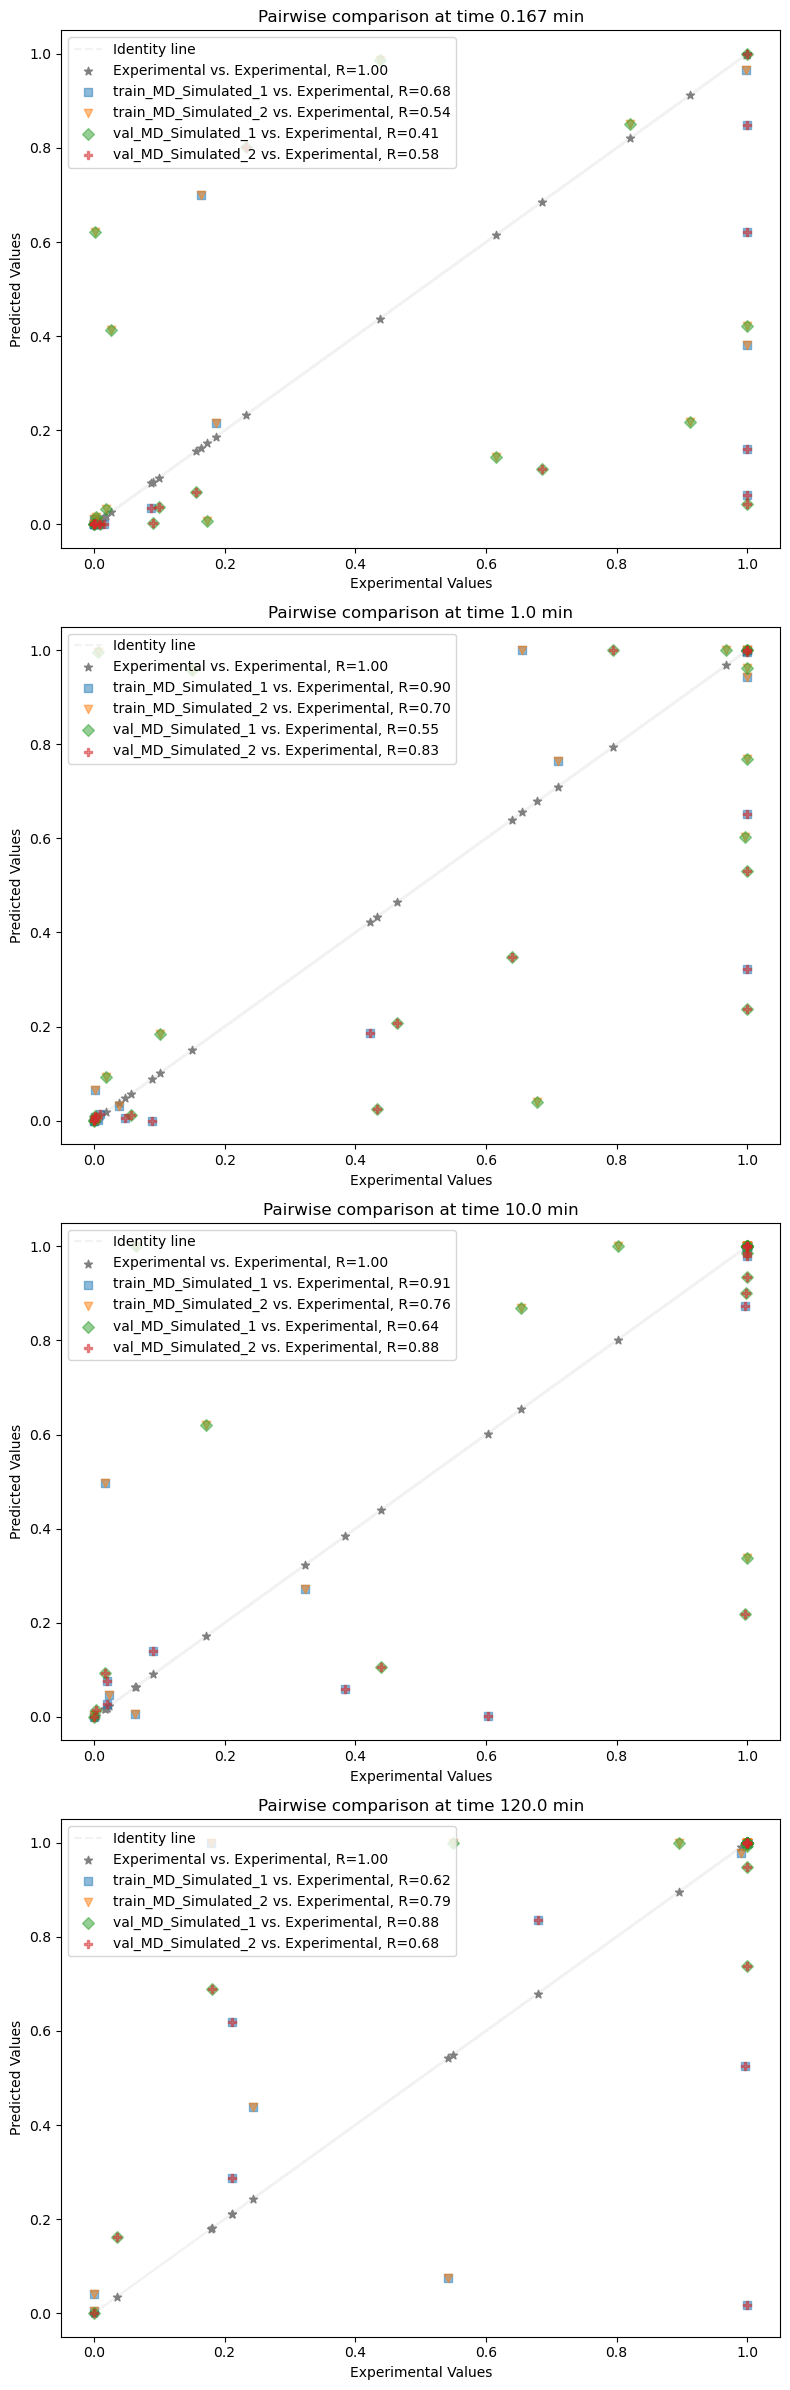

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.00134  0.00802  0.07740  0.61967       32  val_MD_Simulated_2
119  0.04439  0.23808  0.93407  1.00000       33  val_MD_Simulated_2
120  0.00104  0.00621  0.06039  0.52642       35  val_MD_Simulated_2
121  0.00186  0.01111  0.10570  0.73831       36  val_MD_Simulated_2
122  0.03803  0.20721  0.90192  1.00000       38  val_MD_Simulated_2

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train

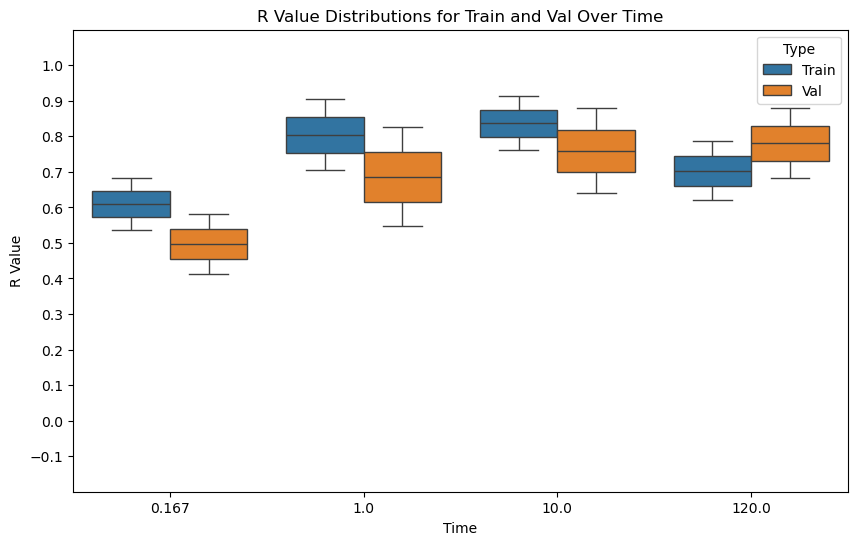

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.21479  0.76494  1.00000  1.00000        3  train_MD_Simulated_1
1    0.62150  0.99703  1.00000  1.00000        4  train_MD_Simulated_1
2    0.84959  0.99999  1.00000  1.00000        7  train_MD_Simulated_1
3    0.01139  0.06627  0.49627  0.99973        8  train_MD_Simulated_1
4    0.00001  0.00004  0.00044  0.00532       11  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
159  0.00134  0.00802  0.07740  0.61967       32    val_MD_Simulated_2
160  0.04439  0.23808  0.93407  1.00000       33    val_MD_Simulated_2
161  0.00104  0.00621  0.06039  0.52642       35    val_MD_Simulated_2
162  0.00186  0.01111  0.10570  0.73831       36    val_MD_Simulated_2
163  0.03803  0.20721  0.90192  1.00000       38    val_MD_Simulated_2

[164 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.21479  0.76494  1.0000

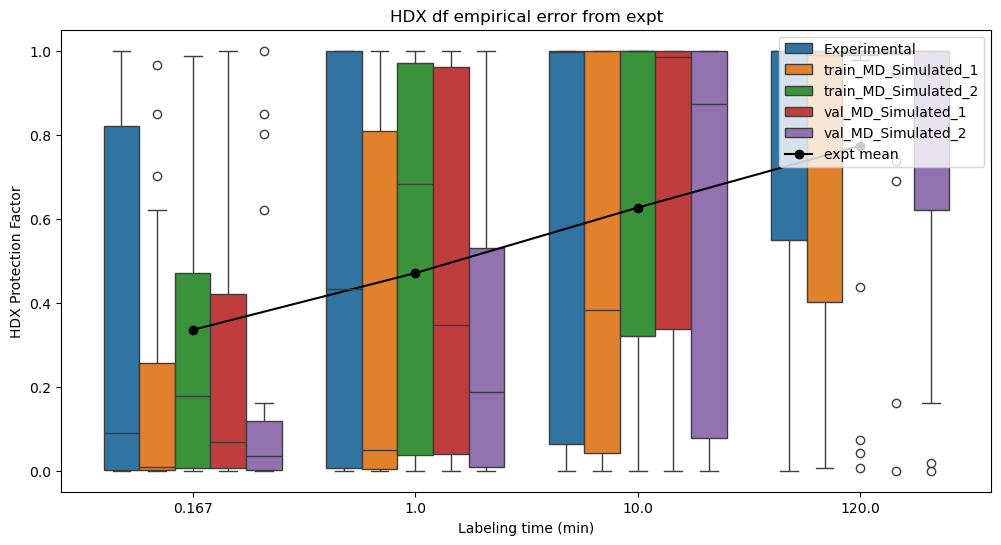

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.21479  0.76494  1.00000  1.00000        3  train_MD_Simulated_1
1    0.62150  0.99703  1.00000  1.00000        4  train_MD_Simulated_1
2    0.84959  0.99999  1.00000  1.00000        7  train_MD_Simulated_1
3    0.01139  0.06627  0.49627  0.99973        8  train_MD_Simulated_1
4    0.00001  0.00004  0.00044  0.00532       11  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
164  0.15669  0.63957  0.99996  1.000

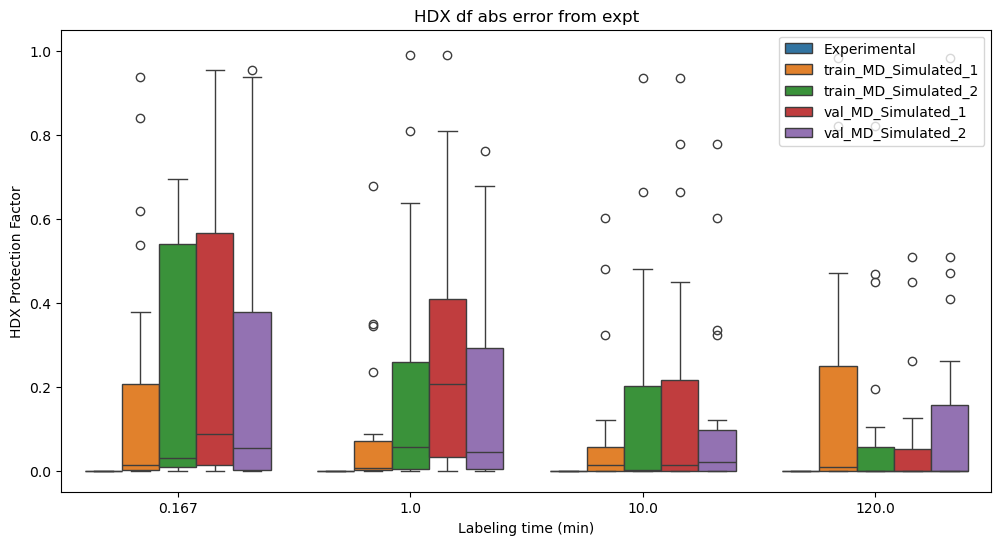

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.21479  0.76494  1.00000  1.00000        3  train_MD_Simulated_1
1    0.62150  0.99703  1.00000  1.00000        4  train_MD_Simulated_1
2    0.84959  0.99999  1.00000  1.00000        7  train_MD_Simulated_1
3    0.01139  0.06627  0.49627  0.99973        8  train_MD_Simulated_1
4    0.00001  0.00004  0.00044  0.00532       11  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
164  0.15669  0.63957  0.99996  1.000

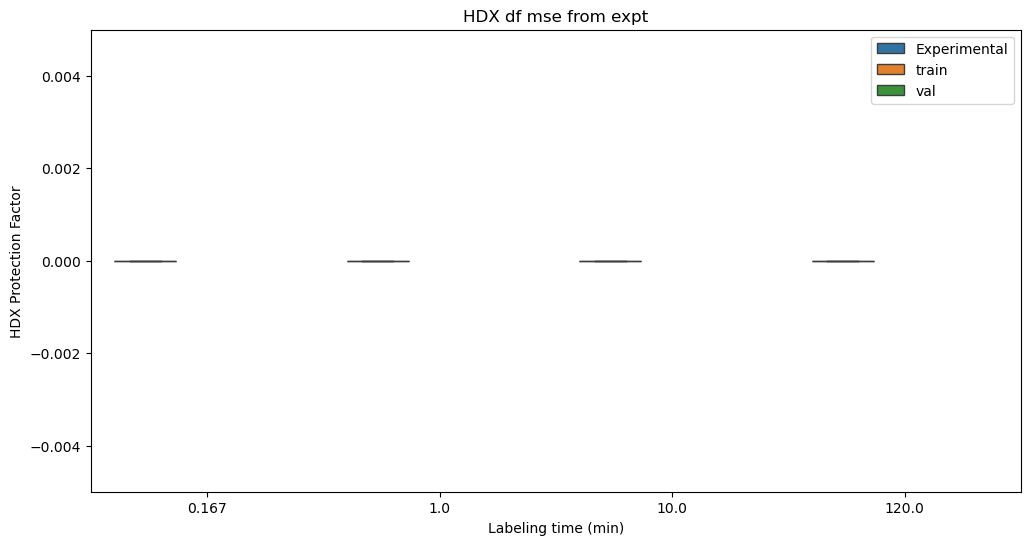

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.21479  0.76494  1.00000  1.00000        3  train_MD_Simulated_1
1    0.62150  0.99703  1.00000  1.00000        4  train_MD_Simulated_1
2    0.84959  0.99999  1.00000  1.00000        7  train_MD_Simulated_1
3    0.01139  0.06627  0.49627  0.99973        8  train_MD_Simulated_1
4    0.00001  0.00004  0.00044  0.00532       11  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

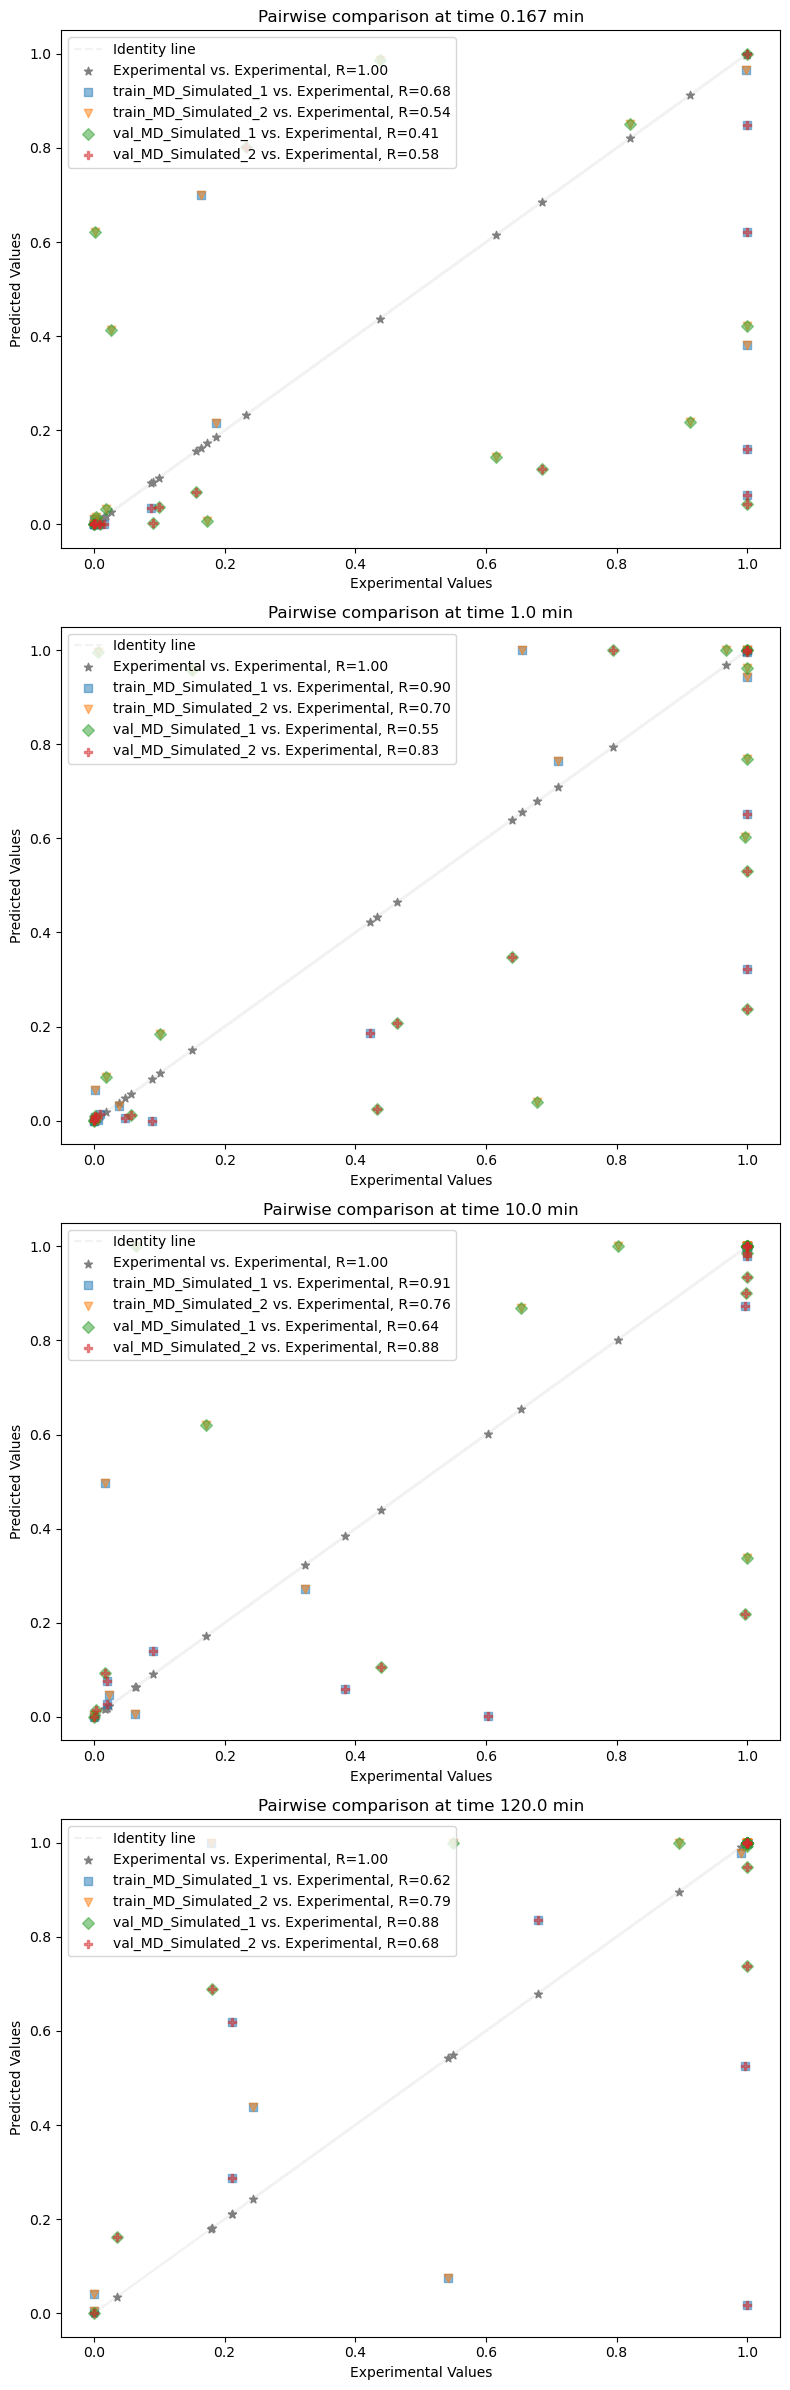

Train coverage: 73.17
Val coverage: 75.61
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
97   0.80164  0.99994  1.00000    1.0        6  val_MD_Simulated_avg
98   0.84959  0.99999  1.00000    1.0        7  val_MD_Simulated_avg
99   0.85090  0.99999  1.00000    1.0        5  val_MD_Simulated_avg
100  0.98769  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
101  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[102 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.

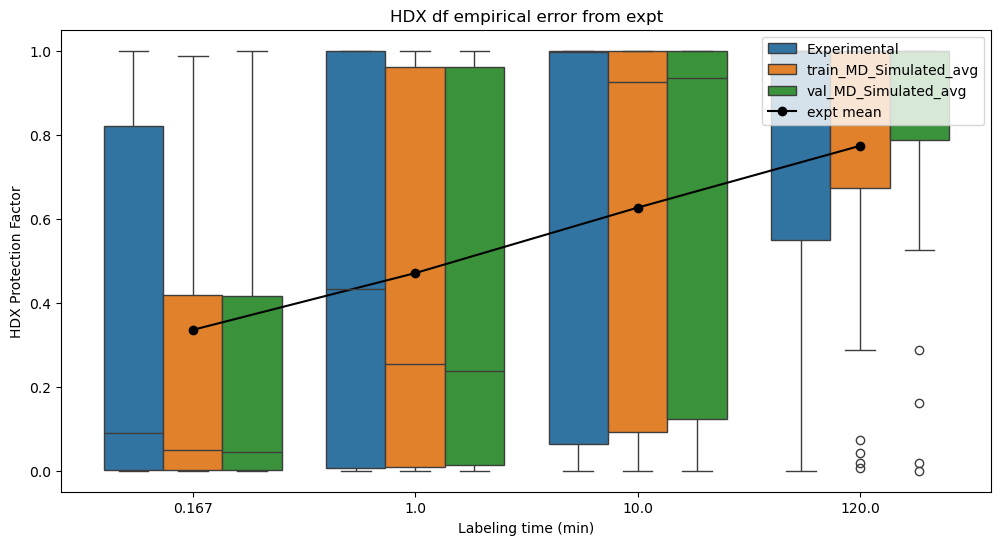

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
97   0.80164  0.99994  1.00000    1.0        6  val_MD_Simulated_avg
98   0.84959  0.99999  1.00000    1.0        7  val_MD_Simulated_avg
99   0.85090  0.99999  1.00000    1.0        5  val_MD_Simulated_avg
100  0.98769  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
101  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[102 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

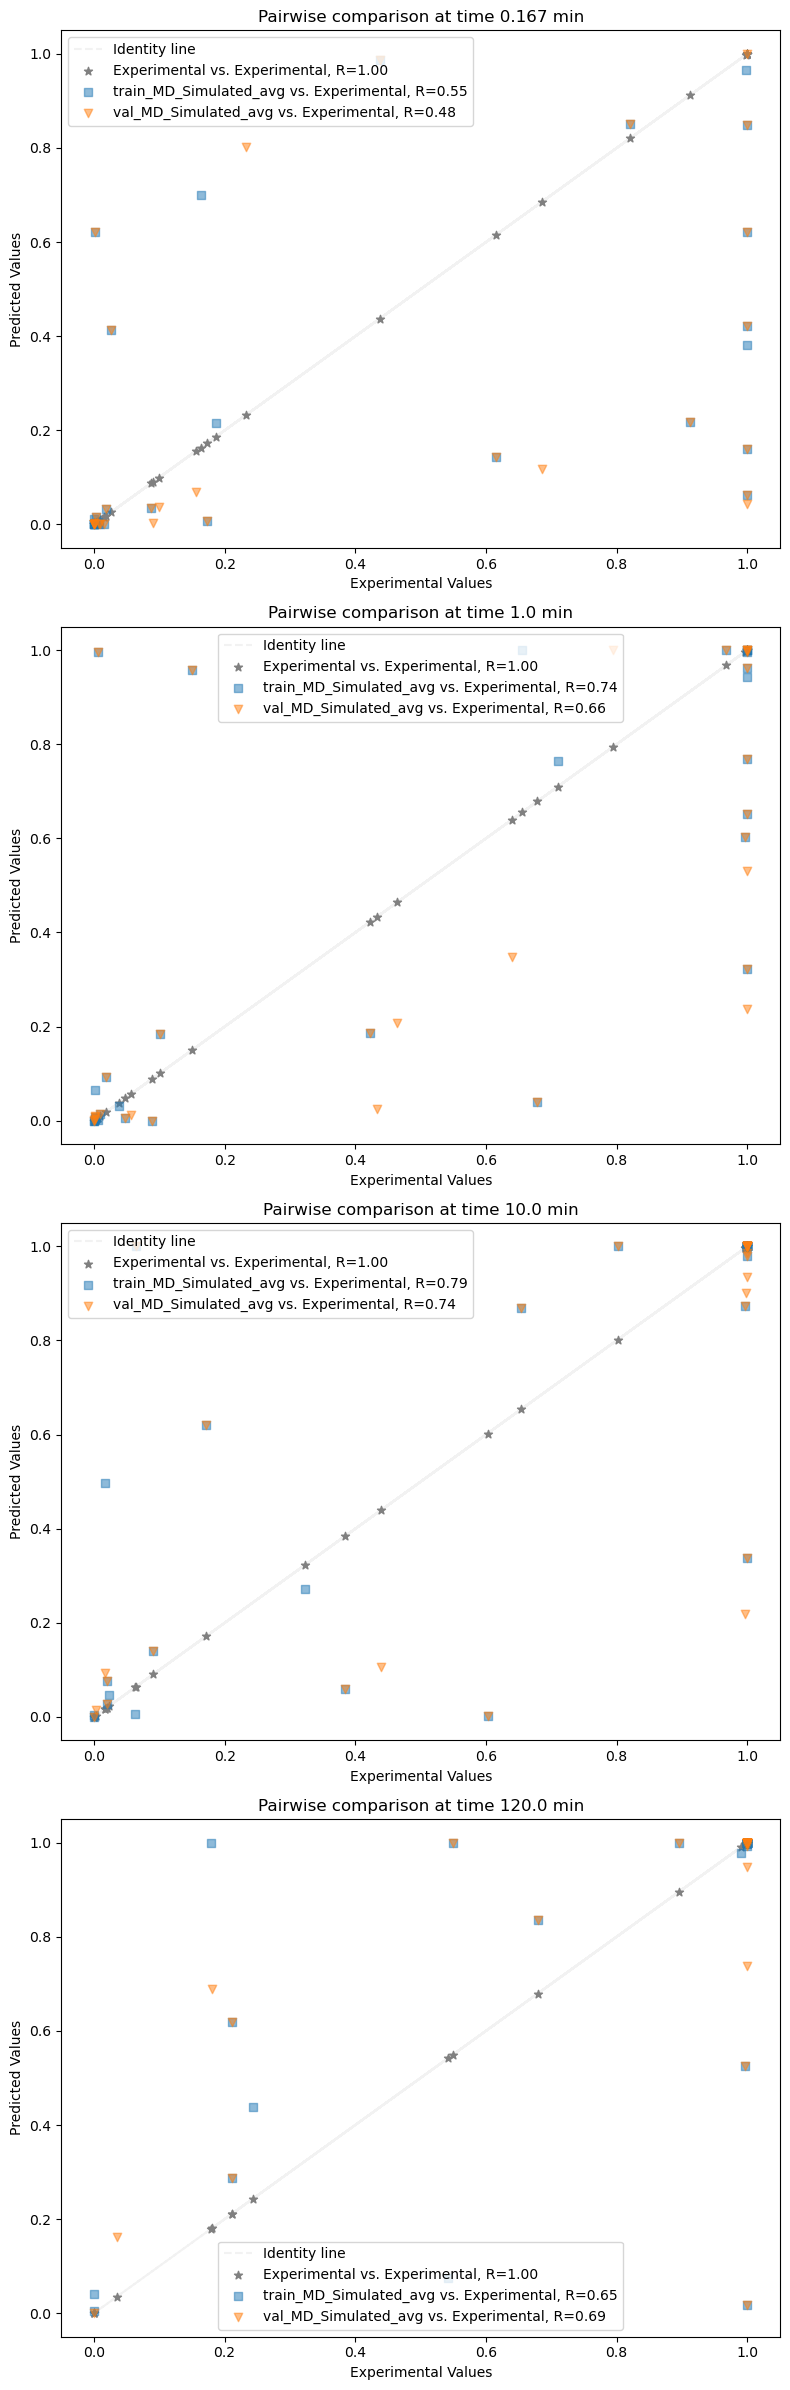

In [13]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [14]:
test_list = [i for i in range(1, 2)]
print(test_list)

[1]


In [15]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full0.555_1706221154.pkl
Saving pickle dump_test_full0.555.pickle


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:430: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [16]:
break


SyntaxError: 'break' outside loop (370545404.py, line 1)

In [ ]:
VDX = VDX.load_experiment(load_path='logs/test_full0.53_1705423086.pkl')

Attempting to load experiment from:  logs/test_full0.53_1705423086.pkl
Loading experiment from:  logs/test_full0.53_1705423086.pkl


['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12274  0.54348  0.99961  1.00000       16  val_MD_Simulated_5
242  0.30181  0.88366  1.00000  1.00000       17  val_MD_Simulated_5
243  0.00143  0.00851  0.08195  0.64158       18  val_MD_Simulated_5
244  0.00414  0.02456  0.22013  0.94939       19  val_MD_S

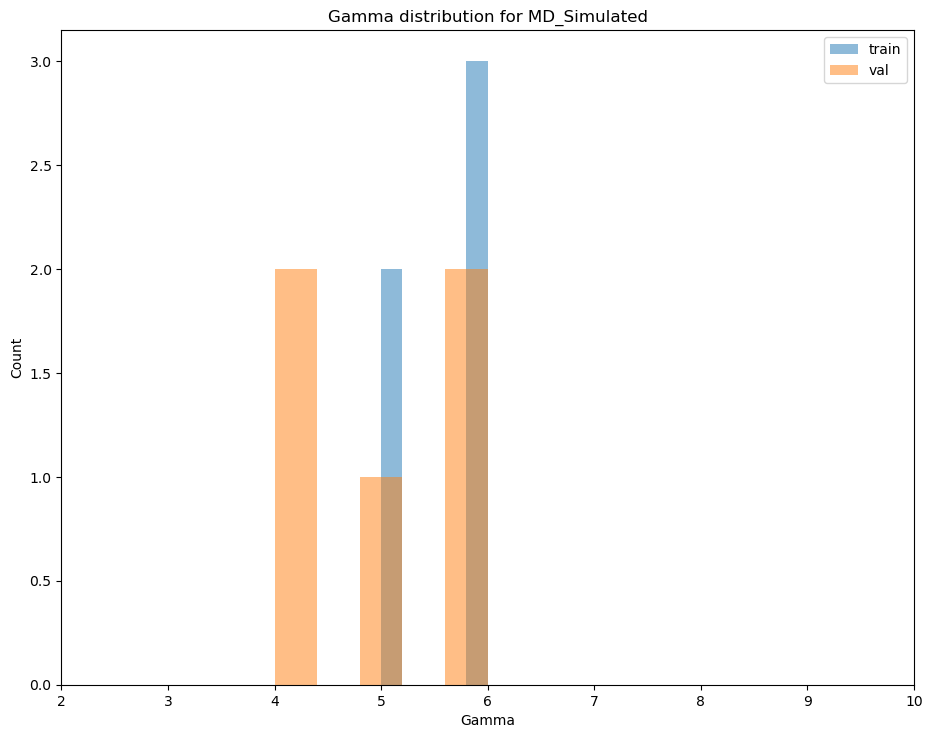

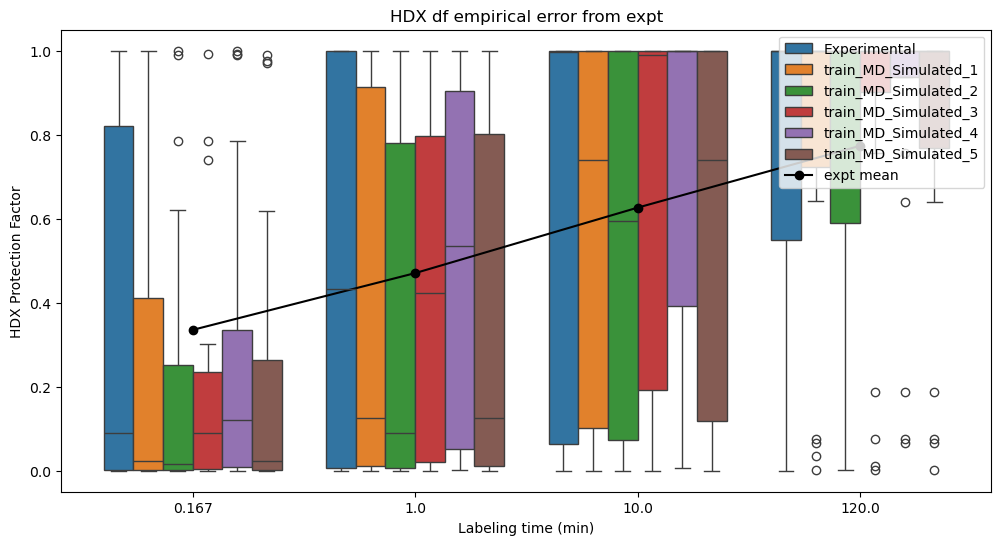

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12274  0.54348  0.99961  1.00000       16  val_MD_Simulated_5
242  0.30181  0.88366  1.00000  1.00000       17  val_MD_Simulated_5
243  0.00143  0.00851  0.08195  0.64158       18  val_MD_Simulated_5
244  0.00414  0.02456  0.22013  0.94939       19  val_MD_Simulated_5
245  0.15270  0.62925  0.99995  1.00000       20  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

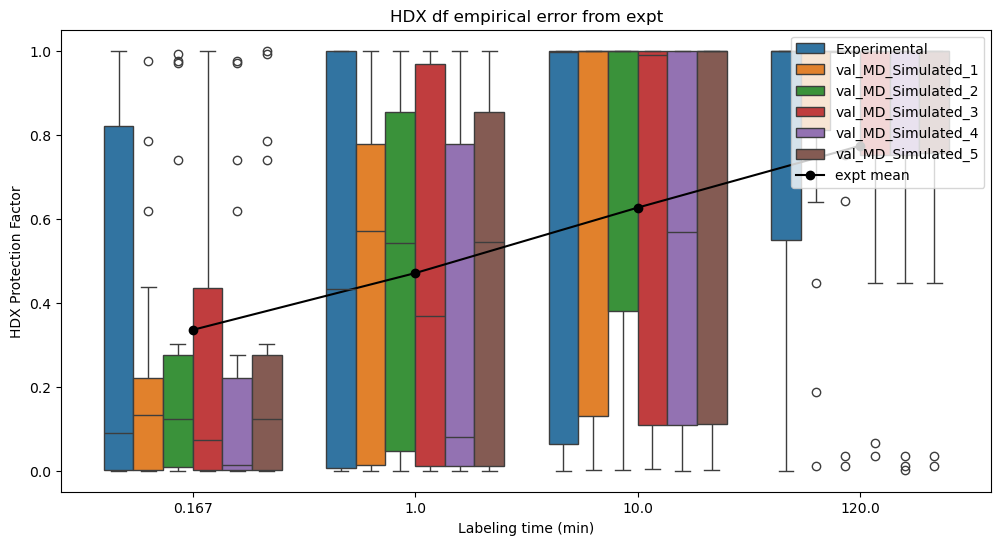

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24]
val_rep_peptides [1, 3, 4, 6, 7, 13, 14, 20, 21, 22, 23, 25, 29, 30, 31, 32, 35, 37, 38, 39, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17]
val_rep_peptides [1, 2, 3, 4, 8, 11, 12, 14, 15, 21, 22, 23, 25, 27

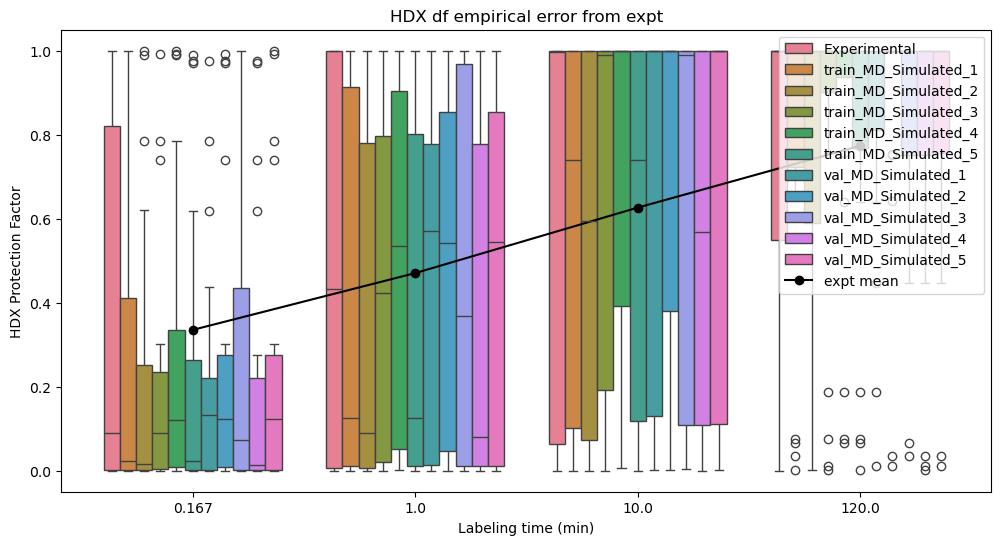

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12274  0.54348  0.99961  1.00000       33  val_MD_Simulated_5
242  0.30181  0.88366  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00143  0.00851  0.08195  0.64158       35  val_MD_Simulated_5
244  0.00414  0.02456  0.22013  0.94939       36  val_MD_Simulated_5
245  0.15270  0.62925  0.99995  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

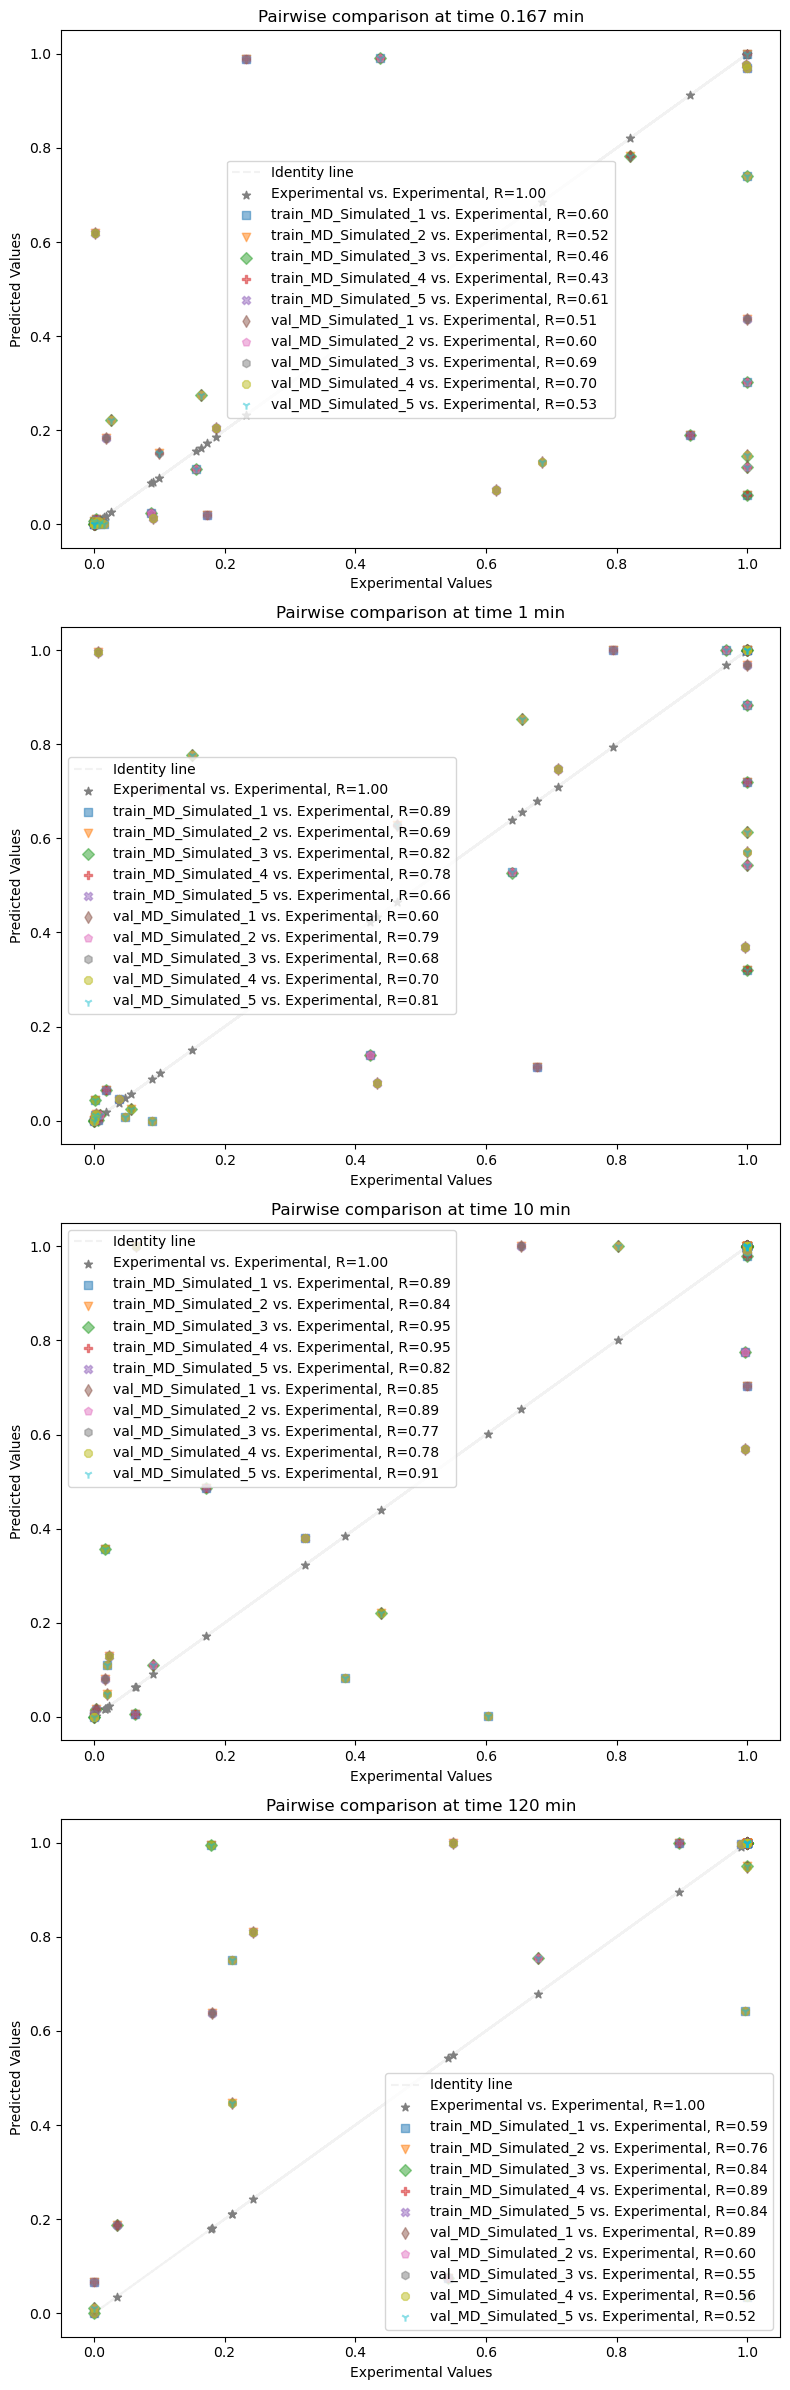

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.12274  0.54348  0.99961  1.00000       33  val_MD_Simulated_5
242  0.30181  0.88366  1.00000  1.00000       34  val_MD_Simulated_5
243  0.00143  0.00851  0.08195  0.64158       35  val_MD_Simulated_5
244  0.00414  0.02456  0.22013  0.94939       36  val_MD_Simulated_5
245  0.15270  0.62925  0.99995  1.00000       38  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1336: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1355: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train

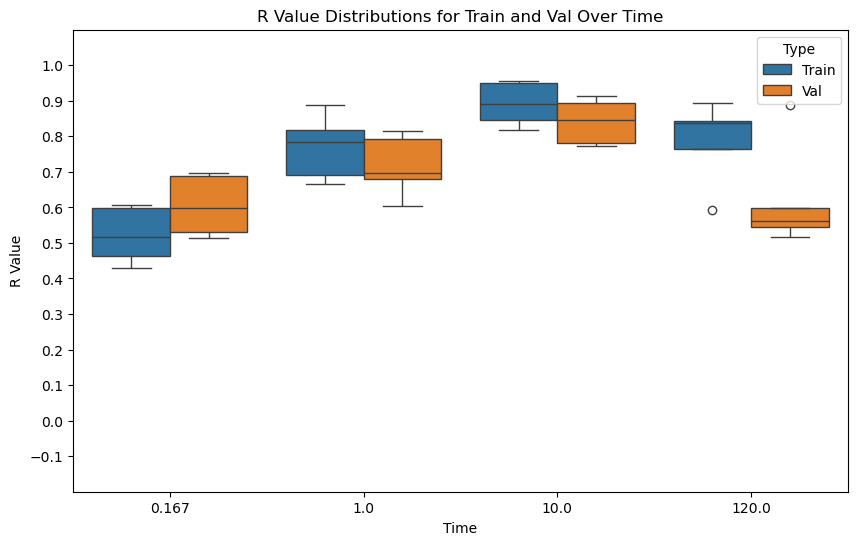

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07461       24  train_MD_Simulated_1
1    0.00009  0.00057  0.00566  0.06587       13  train_MD_Simulated_1
2    0.00733  0.04307  0.35613  0.99492        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00292  0.03443       25  train_MD_Simulated_1
4    0.97015  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.12274  0.54348  0.99961  1.00000       33    val_MD_Simulated_5
406  0.30181  0.88366  1.00000  1.00000       34    val_MD_Simulated_5
407  0.00143  0.00851  0.08195  0.64158       35    val_MD_Simulated_5
408  0.00414  0.02456  0.22013  0.94939       36    val_MD_Simulated_5
409  0.15270  0.62925  0.99995  1.00000       38    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.0064

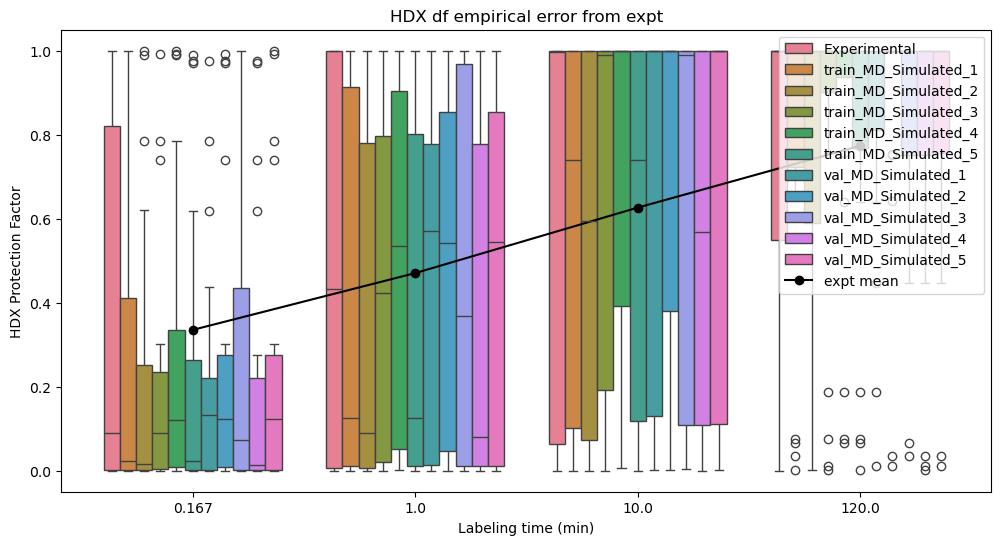

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07461       24  train_MD_Simulated_1
1    0.00009  0.00057  0.00566  0.06587       13  train_MD_Simulated_1
2    0.00733  0.04307  0.35613  0.99492        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00292  0.03443       25  train_MD_Simulated_1
4    0.97015  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
410  0.15669  0.63957  0.99996  1.000

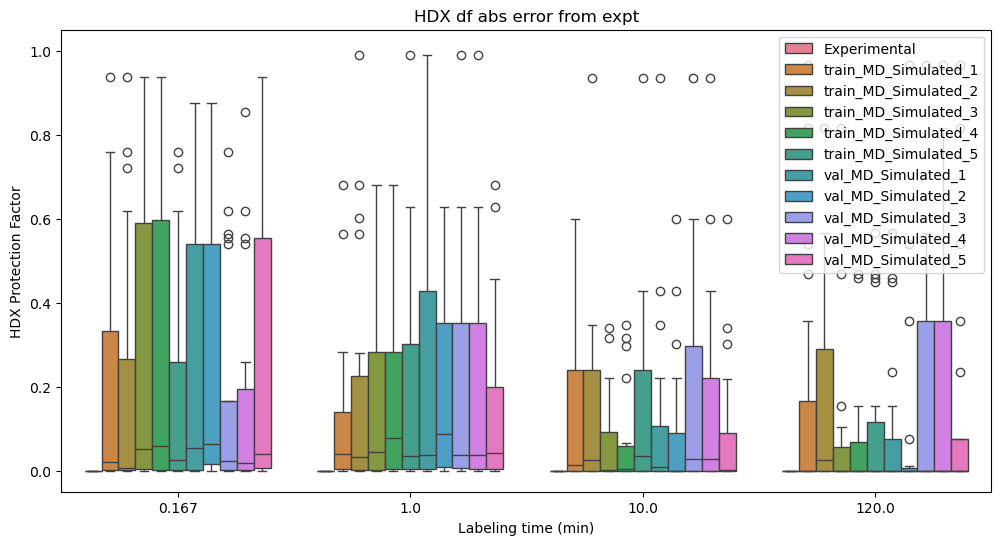

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07461       24  train_MD_Simulated_1
1    0.00009  0.00057  0.00566  0.06587       13  train_MD_Simulated_1
2    0.00733  0.04307  0.35613  0.99492        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00292  0.03443       25  train_MD_Simulated_1
4    0.97015  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
410  0.15669  0.63957  0.99996  1.000

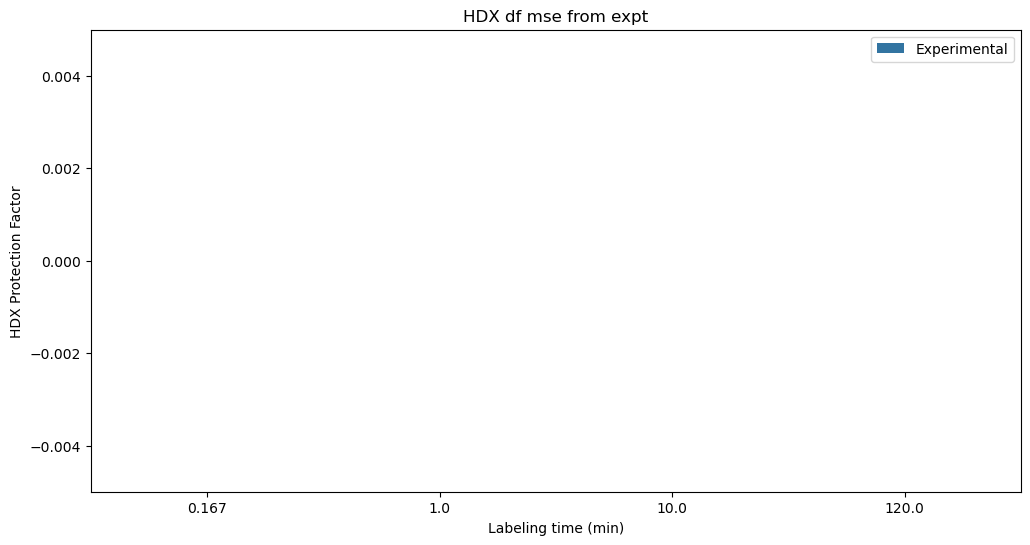

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00065  0.00644  0.07461       24  train_MD_Simulated_1
1    0.00009  0.00057  0.00566  0.06587       13  train_MD_Simulated_1
2    0.00733  0.04307  0.35613  0.99492        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00292  0.03443       25  train_MD_Simulated_1
4    0.97015  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

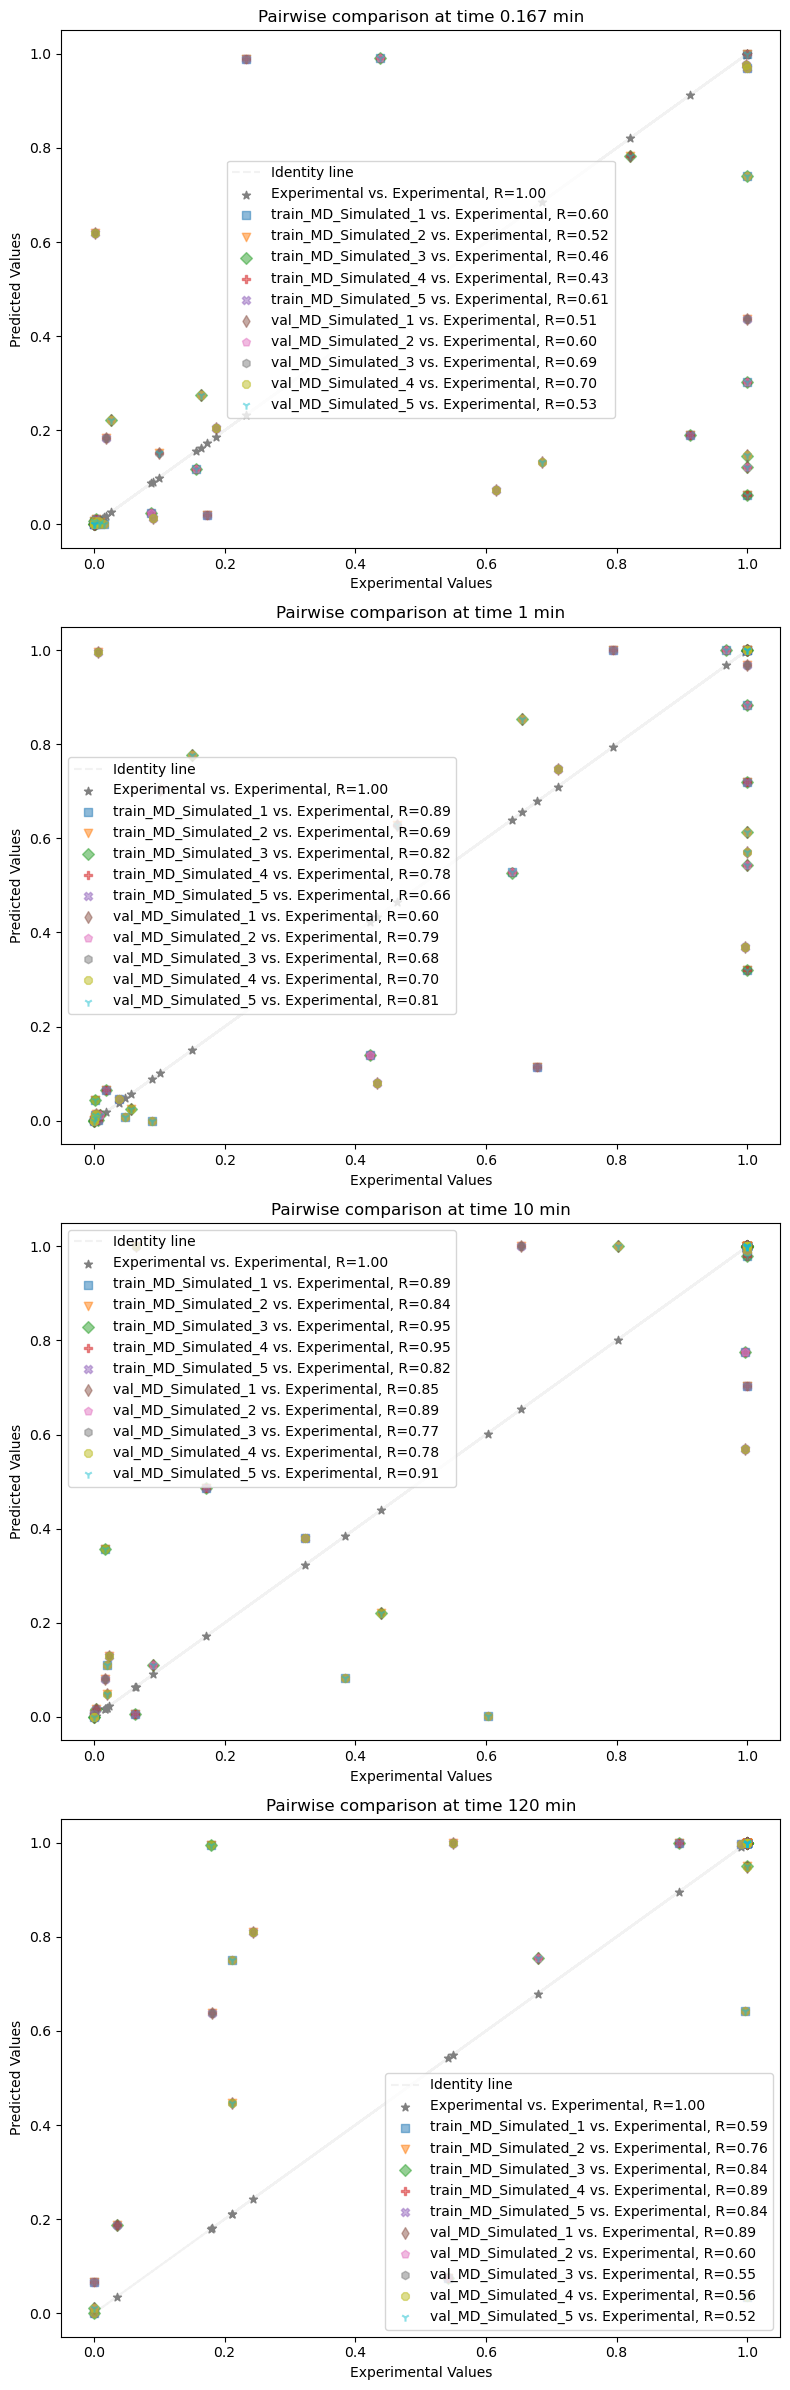

Train coverage: 97.56
Val coverage: 92.68
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
219  0.97537  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  0.98972  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
221  0.99137  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
222  0.99138  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
223  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[224 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.

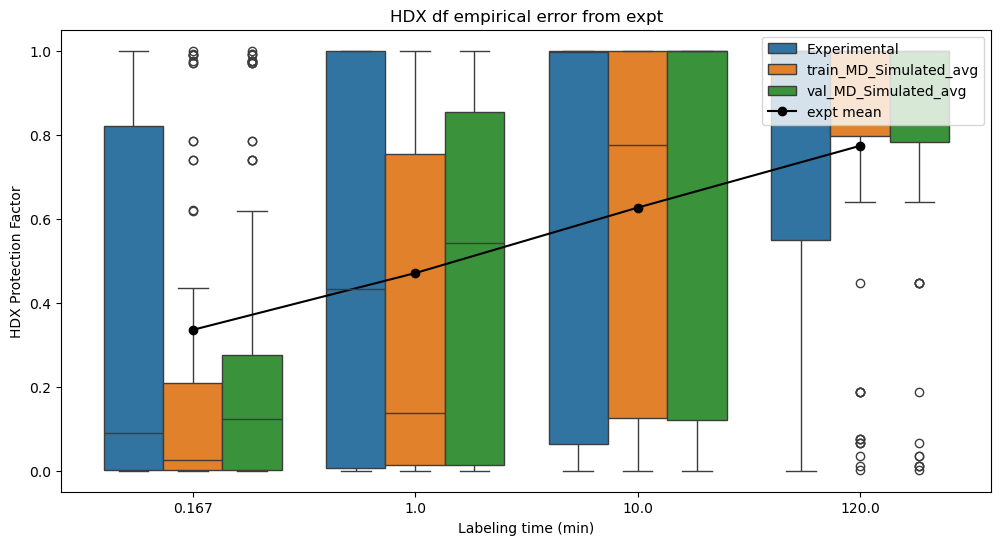

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
219  0.97537  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  0.98972  1.00000  1.00000    1.0        6  val_MD_Simulated_avg
221  0.99137  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
222  0.99138  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
223  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[224 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

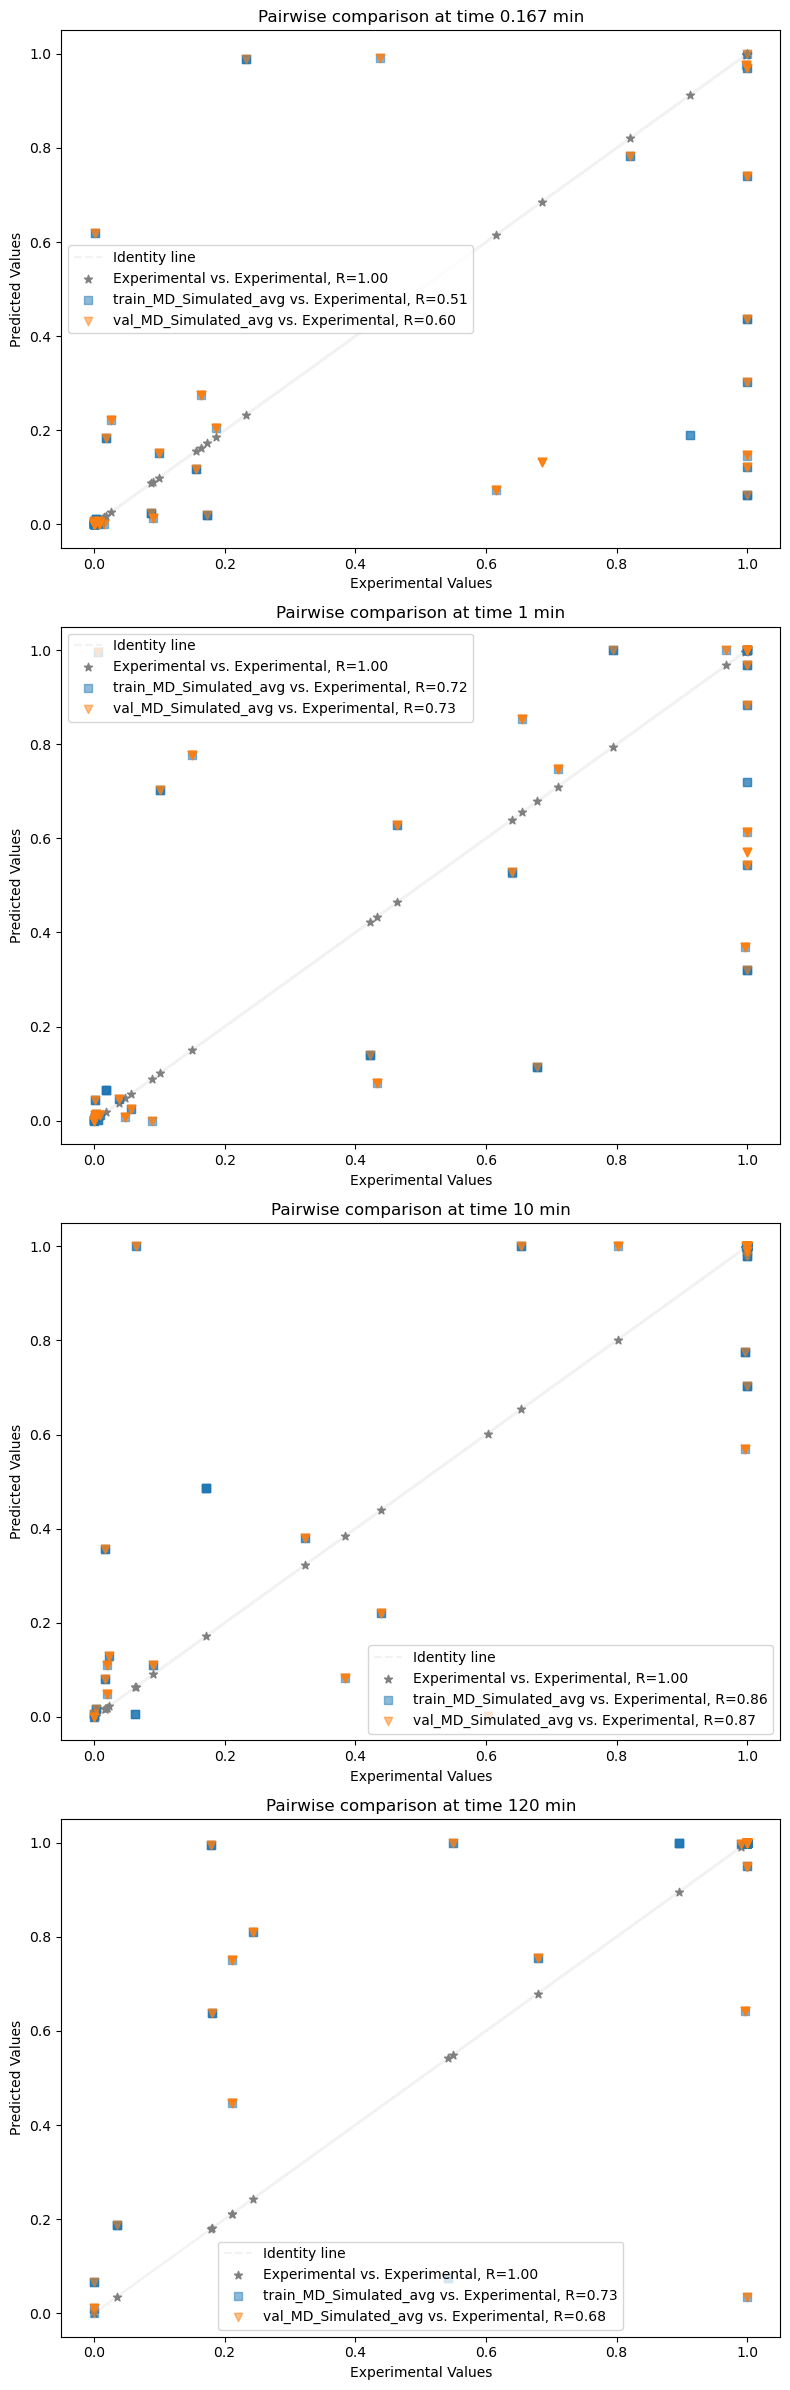

In [ ]:
with open('dump_test_full0.53.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()